In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D

In [2]:
from cmcrameri import cm

In [63]:
gen_combined = pd.read_csv("AR6_coal_generation.csv")
gen_combined = gen_combined[gen_combined["unit"].isin(['WITCH 5.0*EN_NPi2020_800', 'WITCH 5.0*EN_NPi2020_900'])==False]
# these have a wacky secondary energy | electricity (weirdly small)
gen_combined["Share_VRE_Gen"] = gen_combined["Share_Wind_Gen"]+gen_combined["Share_Solar_Gen"]
gen_combined["Solar_TWh"] = gen_combined["Solar_EJ/yr"]*277.778
gen_combined["Wind_TWh"] = gen_combined["Wind_EJ/yr"]*277.778
gen_combined["Coal_TWh"] = gen_combined["Coal_EJ/yr"]*277.778
gen_combined["Gas_TWh"] = gen_combined["Gas_EJ/yr"]*277.778
gen_combined["VRE_TWh"] = gen_combined["Solar_TWh"] + gen_combined["Wind_TWh"]
gen_combined["VRE_EJ/yr"] = gen_combined["Solar_EJ/yr"] + gen_combined["Wind_EJ/yr"]
C1_index = gen_combined[gen_combined["Category"]=="C1"].index
gen_combined.loc[C1_index,"Label"] = "1.5℃ (limited overshoot)"
C2_index = gen_combined[gen_combined["Category"]=="C2"].index
gen_combined.loc[C2_index,"Label"] = "1.5℃ (high overshoot)"
C3_index = gen_combined[gen_combined["Category"]=="C3"].index
gen_combined.loc[C3_index,"Label"] = "Likely below 2℃"
gen_combined

,Model,Scenario,Category,Region,Year,Coal_EJ/yr,Gas_EJ/yr,Solar_EJ/yr,Wind_EJ/yr,Electricity_EJ/yr,...,Share_Gas_Gen,Share_Coal_Gen,Share_VRE_Gen,Solar_TWh,Wind_TWh,Coal_TWh,Gas_TWh,VRE_TWh,VRE_EJ/yr,Label
0,REMIND-MAgPIE 2.1-4.2,EN_NPi2020_600f_COV,C1,R10CHINA+,2005,7.47390,0.21190,0.00040,0.00740,9.6790,...,0.021893,0.772177,0.000806,0.111111,2.055557,2076.084994,58.861158,2.166668,0.00780,1.5℃ (limited overshoot)
1,REMIND-MAgPIE 2.1-4.2,EN_NPi2020_600f_COV,C1,R10CHINA+,2006,8.21882,0.25112,0.00624,0.10592,10.8015,...,0.023249,0.760896,0.010384,1.733335,29.422246,2283.007382,69.755611,31.155580,0.11216,1.5℃ (limited overshoot)
2,REMIND-MAgPIE 2.1-4.2,EN_NPi2020_600f_COV,C1,R10CHINA+,2007,8.96374,0.29034,0.01208,0.20444,11.9240,...,0.024349,0.751739,0.018158,3.355558,56.788934,2489.929770,80.650065,60.144493,0.21652,1.5℃ (limited overshoot)
3,REMIND-MAgPIE 2.1-4.2,EN_NPi2020_600f_COV,C1,R10CHINA+,2008,9.70866,0.32956,0.01792,0.30296,13.0465,...,0.025260,0.744158,0.024595,4.977782,84.155623,2696.852157,91.544518,89.133405,0.32088,1.5℃ (limited overshoot)
4,REMIND-MAgPIE 2.1-4.2,EN_NPi2020_600f_COV,C1,R10CHINA+,2009,10.45358,0.36878,0.02376,0.40148,14.1690,...,0.026027,0.737778,0.030012,6.600005,111.522311,2903.774545,102.438971,118.122317,0.42524,1.5℃ (limited overshoot)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149147,AIM/CGE 2.2,EN_NPi2020_800,C3,R10NORTH_AM,2096,0.00000,0.00000,13.52324,15.74336,54.2126,...,0.000000,0.000000,0.539849,3756.458561,4373.159054,0.000000,0.000000,8129.617615,29.26660,Likely below 2℃
149148,AIM/CGE 2.2,EN_NPi2020_800,C3,R10NORTH_AM,2097,0.00000,0.00000,13.61468,15.84502,54.4273,...,0.000000,0.000000,0.541267,3781.858581,4401.397966,0.000000,0.000000,8183.256547,29.45970,Likely below 2℃
149149,AIM/CGE 2.2,EN_NPi2020_800,C3,R10NORTH_AM,2098,0.00000,0.00000,13.70612,15.94668,54.6420,...,0.000000,0.000000,0.542674,3807.258601,4429.636877,0.000000,0.000000,8236.895478,29.65280,Likely below 2℃
149150,AIM/CGE 2.2,EN_NPi2020_800,C3,R10NORTH_AM,2099,0.00000,0.00000,13.79756,16.04834,54.8567,...,0.000000,0.000000,0.544070,3832.658622,4457.875789,0.000000,0.000000,8290.534410,29.84590,Likely below 2℃


In [4]:
hist_gen = pd.read_csv("combined_generation.csv")
hist_gen_r10 = hist_gen.groupby(["AR6_R10","Year"]).sum()
hist_gen_r10 = hist_gen_r10.drop(columns=["Code","Entity","ISO"])
hist_gen_r10["Share_Solar_Gen"] = hist_gen_r10["Electricity from solar (TWh)"]/hist_gen_r10["Electricity generation (TWh)"]
hist_gen_r10["Share_Wind_Gen"] = hist_gen_r10["Electricity from wind (TWh)"]/hist_gen_r10["Electricity generation (TWh)"]
hist_gen_r10["Share_Nuclear_Gen"] = hist_gen_r10["Electricity from nuclear (TWh)"]/hist_gen_r10["Electricity generation (TWh)"]
hist_gen_r10["Share_Gas_Gen"] = hist_gen_r10["Electricity from gas (TWh)"]/hist_gen_r10["Electricity generation (TWh)"]
hist_gen_r10["Share_Coal_Gen"] = hist_gen_r10["Electricity from coal (TWh)"]/hist_gen_r10["Electricity generation (TWh)"]
hist_gen_r10["Share_VRE_Gen"] = hist_gen_r10["Share_Wind_Gen"]+hist_gen_r10["Share_Solar_Gen"]
hist_gen_r10["Electricity from VRE"] = hist_gen_r10["Electricity from solar (TWh)"] + hist_gen_r10["Electricity from wind (TWh)"]
hist_gen_r10["VRE_EJ"] = hist_gen_r10["Electricity from VRE"]/277.778
hist_gen_r10["Coal_EJ"] = hist_gen_r10["Electricity from coal (TWh)"]/277.778
hist_gen_r10["Gas_EJ"] = hist_gen_r10["Electricity from gas (TWh)"]/277.778
hist_gen_r10 = hist_gen_r10.reset_index()
hist_gen_r10

,AR6_R10,Year,Electricity from solar (TWh),Electricity from wind (TWh),Electricity from nuclear (TWh),Electricity from gas (TWh),Electricity from coal (TWh),Electricity generation (TWh),Share_Solar_Gen,Share_Wind_Gen,Share_Nuclear_Gen,Share_Gas_Gen,Share_Coal_Gen,Share_VRE_Gen,Electricity from VRE,VRE_EJ,Coal_EJ,Gas_EJ
0,R10AFRICA,1990,0.000000,0.000000,8.449,16.4460,155.926,234.910500,0.000000,0.000000,0.035967,0.070010,0.663768,0.000000,0.000000,0.000000,0.561333,0.059206
1,R10AFRICA,1991,0.000000,0.000000,9.144,20.4065,155.388,238.142000,0.000000,0.000000,0.038397,0.085690,0.652501,0.000000,0.000000,0.000000,0.559396,0.073463
2,R10AFRICA,1992,0.000000,0.000000,9.288,22.9445,156.717,241.082000,0.000000,0.000000,0.038526,0.095173,0.650057,0.000000,0.000000,0.000000,0.564181,0.082600
3,R10AFRICA,1993,0.000000,0.000000,7.255,26.1725,165.960,250.767000,0.000000,0.000000,0.028931,0.104370,0.661810,0.000000,0.000000,0.000000,0.597456,0.094221
4,R10AFRICA,1994,0.000000,0.000000,9.697,29.2915,169.402,261.593000,0.000000,0.000000,0.037069,0.111974,0.647578,0.000000,0.000000,0.000000,0.609847,0.105449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,R10REST_ASIA,2018,17.740000,9.250000,136.370,582.4000,593.070,1666.900000,0.010643,0.005549,0.081811,0.349391,0.355792,0.016192,26.990000,0.097164,2.135050,2.096638
326,R10REST_ASIA,2019,22.990000,11.600000,147.750,594.7800,611.940,1700.100000,0.013523,0.006823,0.086907,0.349850,0.359944,0.020346,34.590000,0.124524,2.202982,2.141206
327,R10REST_ASIA,2020,28.850000,11.590000,162.220,553.5500,605.040,1673.550000,0.017239,0.006925,0.096932,0.330764,0.361531,0.024164,40.440000,0.145584,2.178142,1.992778
328,R10REST_ASIA,2021,35.270000,12.840000,166.260,605.5200,620.030,1769.790000,0.019929,0.007255,0.093943,0.342142,0.350341,0.027184,48.110000,0.173196,2.232106,2.179870


In [5]:
C1_c = "#96cfe3"#"#649B1C"
C2_c = "#778664"#"#00B593"
C3_c = "#707898"#"#4E84D4"
C_colors = [C1_c, C2_c, C3_c]
C_list = ["C1", "C2", "C3"]
select_regions = ['R10CHINA+','R10INDIA+','R10EUROPE','R10NORTH_AM']
tech_list = ["Coal","Gas","Wind+Solar"]

In [6]:
stats_regions = pd.DataFrame(data={"Region":select_regions,"max_coal_year":np.nan,"max_coal_TWh":np.nan,
                                   "max_coal_TWh_gas":np.nan,"max_coal_TWh_VRE":np.nan,
                                   "max_coal_share_year":np.nan,"max_coal_share":np.nan,
                                   "max_gas_share_year":np.nan,"max_gas_share":np.nan,
                                   "min_coal_year_C1":np.nan,"min_coal_year_C2":np.nan,"min_coal_year_C3":np.nan}).set_index("Region")
for reg in select_regions:
    select_hist = hist_gen_r10.query("AR6_R10==@reg")
    select_AR6 = gen_combined.query("Region==@reg")
    max_coal_row = select_hist[select_hist["Electricity from coal (TWh)"]==select_hist["Electricity from coal (TWh)"].max()]
    stats_regions.loc[reg, "max_coal_year"] = max_coal_row["Year"].iloc[0]
    stats_regions.loc[reg, "max_coal_TWh"] = max_coal_row["Electricity from coal (TWh)"].iloc[0]
    stats_regions.loc[reg, "max_coal_TWh_gas"] = max_coal_row["Electricity from gas (TWh)"].iloc[0]
    stats_regions.loc[reg, "max_coal_TWh_VRE"] = max_coal_row["Electricity from solar (TWh)"].iloc[0]+max_coal_row["Electricity from wind (TWh)"].iloc[0]
    stats_regions.loc[reg, "max_coal_gas_share"] = max_coal_row["Share_Gas_Gen"].iloc[0]
    stats_regions.loc[reg, "max_coal_VRE_share"] = max_coal_row["Share_VRE_Gen"].iloc[0]
    # maximum coal share
    max_coal_row_share = select_hist[select_hist["Share_Coal_Gen"]==select_hist["Share_Coal_Gen"].max()]
    stats_regions.loc[reg, "max_coal_share_year"] = max_coal_row_share["Year"].iloc[0]
    stats_regions.loc[reg, "max_coal_share"] = max_coal_row_share["Share_Coal_Gen"].iloc[0]
    max_gas_row_share = select_hist[select_hist["Share_Gas_Gen"]==select_hist["Share_Gas_Gen"].max()]
    stats_regions.loc[reg, "max_gas_share_year"] = max_gas_row_share["Year"].iloc[0]
    stats_regions.loc[reg, "max_gas_share"] = max_gas_row_share["Share_Gas_Gen"].iloc[0]
    min_coal_row = select_AR6[select_AR6["Share_Coal_Gen"]<=0.01]
    stats_regions.loc[reg, "min_coal_year_C1"] = min_coal_row.query("Category=='C1'").groupby("unit").min()["Year"].mean()
    stats_regions.loc[reg, "min_coal_year_C2"] = min_coal_row.query("Category=='C2'").groupby("unit").min()["Year"].mean()
    stats_regions.loc[reg, "min_coal_year_C3"] = min_coal_row.query("Category=='C3'").groupby("unit").min()["Year"].mean()
    stats_regions.loc[reg, "gas_share_C1"] = min_coal_row.query("Category=='C1'").groupby("unit").max()["Share_Gas_Gen"].mean()
    stats_regions.loc[reg, "gas_share_C2"] = min_coal_row.query("Category=='C2'").groupby("unit").max()["Share_Gas_Gen"].mean()
    stats_regions.loc[reg, "gas_share_C3"] = min_coal_row.query("Category=='C3'").groupby("unit").max()["Share_Gas_Gen"].mean()
    stats_regions.loc[reg, "VRE_share_C1"] = min_coal_row.query("Category=='C1'").groupby("unit").min()["Share_VRE_Gen"].mean()
    stats_regions.loc[reg, "VRE_share_C2"] = min_coal_row.query("Category=='C2'").groupby("unit").min()["Share_VRE_Gen"].mean()
    stats_regions.loc[reg, "VRE_share_C3"] = min_coal_row.query("Category=='C3'").groupby("unit").min()["Share_VRE_Gen"].mean()
stats_regions["C1_duration"] = stats_regions["min_coal_year_C1"] - stats_regions["max_coal_year"]
stats_regions["C2_duration"] = stats_regions["min_coal_year_C2"] - stats_regions["max_coal_year"]
stats_regions["C3_duration"] = stats_regions["min_coal_year_C3"] - stats_regions["max_coal_year"]
stats_regions["test"] = stats_regions["max_coal_share"]/stats_regions["C1_duration"]
stats_regions

,max_coal_year,max_coal_TWh,max_coal_TWh_gas,max_coal_TWh_VRE,max_coal_share_year,max_coal_share,max_gas_share_year,max_gas_share,min_coal_year_C1,min_coal_year_C2,...,gas_share_C1,gas_share_C2,gas_share_C3,VRE_share_C1,VRE_share_C2,VRE_share_C3,C1_duration,C2_duration,C3_duration,test
Region,,,,,,,,,,,,,,,,,,,,,
R10CHINA+,2022.0,5527.340000,304.360000,1256.370000,2007.0,0.794200,2016.0,0.037005,2032.500000,2038.74,...,0.129698,0.104411,0.120894,0.460266,0.505291,0.500248,10.500000,16.74,16.965812,0.075638
R10INDIA+,2022.0,1389.750000,155.130000,172.935155,2018.0,0.668134,2010.0,0.163628,2035.265625,2039.76,...,0.024410,0.051086,0.059819,0.648448,0.605835,0.604039,13.265625,17.76,20.064935,0.050366
R10EUROPE,1991.0,1025.549995,201.000000,1.102000,1990.0,0.362589,2008.0,0.237025,2031.125000,2034.63,...,0.071284,0.138495,0.112706,0.509385,0.467407,0.471686,40.125000,43.63,45.589744,0.009036
R10NORTH_AM,1999.0,2144.049755,626.150024,5.226937,1997.0,0.488530,2020.0,0.361856,2030.640625,2033.70,...,0.159027,0.246687,0.195670,0.483117,0.407966,0.457556,31.640625,34.70,36.858974,0.015440


In [7]:
for reg in select_regions:
    # historical data
    reg_hist = hist_gen_r10.query("AR6_R10==@reg")
    reg_hist = reg_hist[reg_hist["Year"]>=stats_regions.loc[reg,"max_coal_year"]]
    hist_index = reg_hist.index
    hist_gen_r10.loc[hist_index,"Coal_Growth_TWh"] = hist_gen_r10.loc[hist_index,"Electricity from coal (TWh)"] - stats_regions.loc[reg,"max_coal_TWh"]
    hist_gen_r10.loc[hist_index,"Gas_Growth_TWh"] = hist_gen_r10.loc[hist_index,"Electricity from gas (TWh)"] - stats_regions.loc[reg,"max_coal_TWh_gas"]
    hist_gen_r10.loc[hist_index,"VRE_Growth_TWh"] = hist_gen_r10.loc[hist_index,"Electricity from solar (TWh)"] + hist_gen_r10.loc[hist_index,"Electricity from wind (TWh)"] - stats_regions.loc[reg,"max_coal_TWh_VRE"]
    hist_gen_r10.loc[hist_index,"Coal_Growth_Share"] = hist_gen_r10.loc[hist_index,"Coal_Growth_TWh"]/stats_regions.loc[reg,"max_coal_TWh"]
    hist_gen_r10.loc[hist_index,"Gas_Growth_Share"] = hist_gen_r10.loc[hist_index,"Gas_Growth_TWh"]/stats_regions.loc[reg,"max_coal_TWh"]
    hist_gen_r10.loc[hist_index,"VRE_Growth_Share"] = hist_gen_r10.loc[hist_index,"VRE_Growth_TWh"]/stats_regions.loc[reg,"max_coal_TWh"]
    hist_gen_r10.loc[hist_index,"years_since_coal_peak"] = hist_gen_r10.loc[hist_index,"Year"] - stats_regions.loc[reg,"max_coal_year"]
    # ar6 data
    reg_ar6 = gen_combined.query("Region==@reg")
    ar6_index = reg_ar6.index
    gen_combined.loc[ar6_index,"Coal_Growth_TWh"] = gen_combined.loc[ar6_index,"Coal_TWh"] - stats_regions.loc[reg,"max_coal_TWh"]
    gen_combined.loc[ar6_index,"Gas_Growth_TWh"] = gen_combined.loc[ar6_index,"Gas_TWh"] - stats_regions.loc[reg,"max_coal_TWh_gas"]
    gen_combined.loc[ar6_index,"VRE_Growth_TWh"] = gen_combined.loc[ar6_index,"VRE_TWh"] - stats_regions.loc[reg,"max_coal_TWh_VRE"]
    gen_combined.loc[ar6_index,"Coal_Growth_Share"] = gen_combined.loc[ar6_index,"Coal_Growth_TWh"]/stats_regions.loc[reg,"max_coal_TWh"]
    gen_combined.loc[ar6_index,"Gas_Growth_Share"] = gen_combined.loc[ar6_index,"Gas_Growth_TWh"]/stats_regions.loc[reg,"max_coal_TWh"]
    gen_combined.loc[ar6_index,"VRE_Growth_Share"] = gen_combined.loc[ar6_index,"VRE_Growth_TWh"]/stats_regions.loc[reg,"max_coal_TWh"]
    gen_combined.loc[ar6_index,"years_since_coal_peak"] = gen_combined.loc[ar6_index,"Year"] - stats_regions.loc[reg,"max_coal_year"]

### IEA STEPS and APS scenario

In [29]:
coal_IEA = pd.read_csv("../../data/IEA/IEA_coal_generation_region.csv")
hist_data_coal = coal_IEA.query("Year==2022")
coal_IEA = pd.concat([coal_IEA,hist_data_coal.replace("Historical","STEPS")])
coal_IEA = pd.concat([coal_IEA,hist_data_coal.replace("Historical","APS")])
coal_IEA

,Region,Coal_Gen_TWh,Data_type,Year
0,World,8668.55,Historical,2010.0
1,North America,2106.01,Historical,2010.0
2,United States,1994.19,Historical,2010.0
3,Central and South America,41.26,Historical,2010.0
4,Brazil,11.34,Historical,2010.0
...,...,...,...,...
43,Asia Pacific,8175.79,APS,2022.0
44,China,5536.03,APS,2022.0
45,India,1270.29,APS,2022.0
46,Japan,333.49,APS,2022.0


In [46]:
gas_IEA = pd.read_csv("../../data/IEA/IEA_gas_generation_region.csv")
hist_data_gas = gas_IEA.query("Year==2022")
gas_IEA = pd.concat([gas_IEA,hist_data_gas.replace("Historical","STEPS")])
gas_IEA = pd.concat([gas_IEA,hist_data_gas.replace("Historical","APS")])
gas_IEA

,Region,Gas_Gen_TWh,Data_type,Year
0,World,4847.26,Historical,2010.0
1,North America,1216.54,Historical,2010.0
2,United States,1017.66,Historical,2010.0
3,Central and South America,170.30,Historical,2010.0
4,Brazil,36.47,Historical,2010.0
...,...,...,...,...
43,Asia Pacific,1442.50,APS,2022.0
44,China,257.20,APS,2022.0
45,India,39.41,APS,2022.0
46,Japan,358.68,APS,2022.0


# visualisation

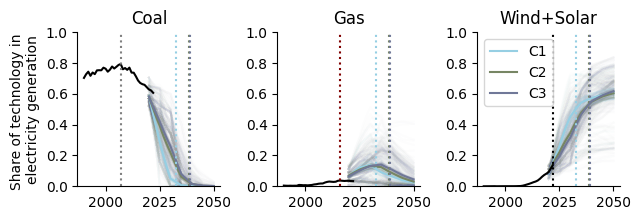

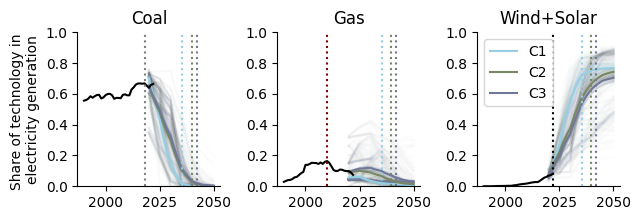

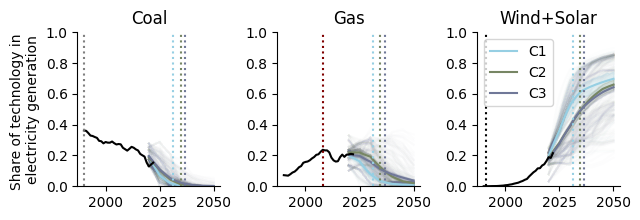

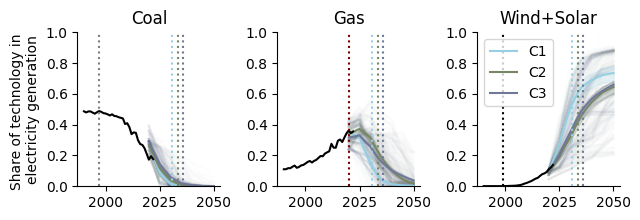

In [8]:
variables = ['Share_Coal_Gen','Share_Gas_Gen','Share_VRE_Gen']
for reg in select_regions:
    fig, axes = plt.subplots(1,3,figsize=(7,2))
    fig.subplots_adjust(wspace=0.4)
    for i in [0,1,2]:
        var_name = variables[i]
        tech_name = tech_list[i]
        plot_data = gen_combined.query("Region==@reg")
        plot_data = plot_data[plot_data["Year"]>=2020]
        plot_data = plot_data[plot_data["Year"]<=2050]
        hist_plot_data = hist_gen_r10.query("AR6_R10==@reg")
        # projection data
        sns.lineplot(x="Year",y=var_name,data=plot_data,hue="Category",palette=C_colors,
                     units="unit",estimator=None,alpha=0.01,zorder=1,legend=None,ax=axes[i])
        if i == 2:
            sns.lineplot(x="Year", y=var_name,hue="Category",palette=C_colors,data=plot_data,ax=axes[i])
            axes[i].legend(loc='center left', bbox_to_anchor=(1, 0.5),frameon=False)
        else:
            sns.lineplot(x="Year", y=var_name,hue="Category",palette=C_colors,data=plot_data,ax=axes[i],legend=None)
        # historical data
        sns.lineplot(x="Year", y=var_name,color="black",data=hist_plot_data,ax=axes[i])
        axes[i].set_ylim([0,1])
        axes[i].spines['top'].set_visible(False)
        axes[i].spines['right'].set_visible(False)
        axes[i].set_title(tech_name)
        
        axes[i].axvline(x = stats_regions.loc[reg,"min_coal_year_C1"],color=C1_c,linestyle=":")
        axes[i].axvline(x = stats_regions.loc[reg,"min_coal_year_C2"],color=C2_c,linestyle=":")
        axes[i].axvline(x = stats_regions.loc[reg,"min_coal_year_C3"],color=C3_c,linestyle=":")
        axes[i].set_xlabel(None)
    axes[i].axvline(x = stats_regions.loc[reg,"max_coal_year"],color="black",linestyle=":")
    axes[1].axvline(x = stats_regions.loc[reg,"max_gas_share_year"],color="maroon",linestyle=":")
    axes[0].axvline(x = stats_regions.loc[reg,"max_coal_share_year"],color="gray",linestyle=":")
    axes[1].set_ylabel(None)
    axes[2].set_ylabel(None)
    axes[0].set_ylabel("Share of technology in \nelectricity generation")
    fig.savefig("figure_output/share_electricity_"+reg+".png",dpi=600, bbox_inches='tight')

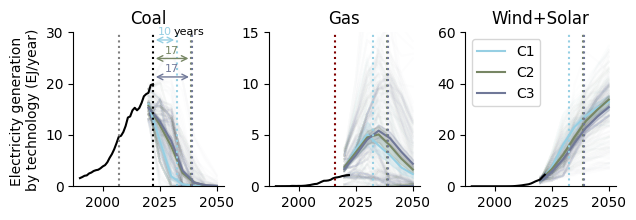

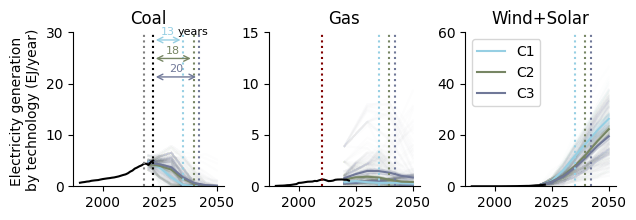

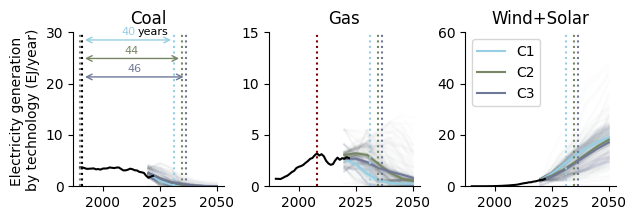

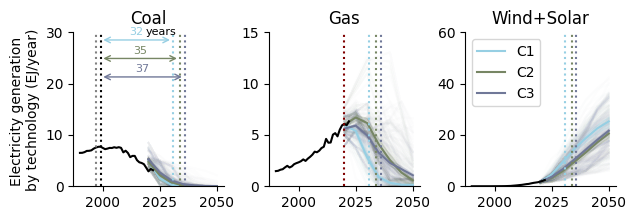

In [9]:
variables = ['Coal_EJ','Gas_EJ','VRE_EJ']
variables_AR6 = ["Coal_EJ/yr","Gas_EJ/yr","VRE_EJ/yr"]
#upper_lim = [8000,8000,15000]
upper_lim = [30,15,60]
for reg in select_regions:
    fig, axes = plt.subplots(1,3,figsize=(7,2))
    fig.subplots_adjust(wspace=0.3)
    for i in [0,1,2]:
        var_name = variables[i]
        var_name_AR6 = variables_AR6[i]
        tech_name = tech_list[i]
        plot_data = gen_combined.query("Region==@reg")
        plot_data = plot_data[plot_data["Year"]>=2020]
        plot_data = plot_data[plot_data["Year"]<=2050]
        hist_plot_data = hist_gen_r10.query("AR6_R10==@reg")
        # projection data
        sns.lineplot(x="Year",y=var_name_AR6,data=plot_data,hue="Category",palette=C_colors,
                     units="unit",estimator=None,alpha=0.01,zorder=1,legend=None,ax=axes[i])
        if i !=2:
            sns.lineplot(x="Year", y=var_name_AR6,hue="Category",palette=C_colors,data=plot_data,ax=axes[i],legend=None)
        else:
            sns.lineplot(x="Year", y=var_name_AR6,hue="Category",palette=C_colors,data=plot_data,ax=axes[i])
            axes[i].legend(loc='center left', bbox_to_anchor=(1, 0.5),frameon=False)
        # historical data
        sns.lineplot(x="Year", y=var_name,color="black",data=hist_plot_data,ax=axes[i])
        axes[i].spines['top'].set_visible(False)
        axes[i].spines['right'].set_visible(False)
        axes[i].set_title(tech_name)
        axes[i].set_ylim([0,upper_lim[i]])
        axes[i].set_xlabel(None)
        
        axes[i].axvline(x = stats_regions.loc[reg,"min_coal_year_C1"],color=C1_c,linestyle=":")
        axes[i].axvline(x = stats_regions.loc[reg,"min_coal_year_C2"],color=C2_c,linestyle=":")
        axes[i].axvline(x = stats_regions.loc[reg,"min_coal_year_C3"],color=C3_c,linestyle=":")
    # stats
    axes[1].axvline(x = stats_regions.loc[reg,"max_gas_share_year"],color="maroon",linestyle=":")
    axes[0].axvline(x = stats_regions.loc[reg,"max_coal_year"],color="black",linestyle=":")
    axes[0].axvline(x = stats_regions.loc[reg,"max_coal_share_year"],color="gray",linestyle=":")
    [bot,top] = axes[0].get_ylim()
    C1_duration = stats_regions.loc[reg,"C1_duration"]
    axes[0].annotate(text="", xy=(stats_regions.loc[reg,"min_coal_year_C1"],top*0.95),
                     xytext=(stats_regions.loc[reg,"max_coal_year"],top*0.95), 
                     arrowprops=dict(arrowstyle='<->',color=C1_c,lw=1))
    axes[0].text(x=(stats_regions.loc[reg,"max_coal_year"]+C1_duration/2),y=top*0.98,s=str(round(C1_duration)),fontsize=8,ha="center",color=C1_c)
    axes[0].text(x=(stats_regions.loc[reg,"max_coal_year"]+C1_duration/2)+4,y=top*0.98,s="years",fontsize=8,ha="left",color="black")
    C2_duration = stats_regions.loc[reg,"C2_duration"]
    axes[0].annotate(text="", xy=(stats_regions.loc[reg,"min_coal_year_C2"],top*0.83),
                     xytext=(stats_regions.loc[reg,"max_coal_year"],top*0.83), 
                     arrowprops=dict(arrowstyle='<->',color=C2_c,lw=1))
    axes[0].text(x=(stats_regions.loc[reg,"max_coal_year"]+C2_duration/2),y=top*0.86,s=str(round(C2_duration)),fontsize=8,ha="center",color=C2_c)
    C3_duration = stats_regions.loc[reg,"C3_duration"]
    axes[0].annotate(text="", xy=(stats_regions.loc[reg,"min_coal_year_C3"],top*0.71),
                     xytext=(stats_regions.loc[reg,"max_coal_year"],top*0.71), 
                     arrowprops=dict(arrowstyle='<->',color=C3_c,lw=1))
    axes[0].text(x=(stats_regions.loc[reg,"max_coal_year"]+C3_duration/2),y=top*0.74,s=str(round(C3_duration)),fontsize=8,ha="center",color=C3_c)
    #axes[2].legend(loc='center left', bbox_to_anchor=(1, 0.5),frameon=False)
    axes[1].set_ylabel(None)
    axes[2].set_ylabel(None)
    axes[0].set_ylabel("Electricity generation \nby technology (EJ/year)")
    fig.savefig("figure_output/gen_electricity_"+reg+".png",dpi=600, bbox_inches='tight')

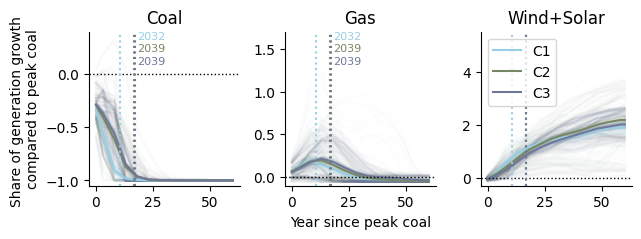

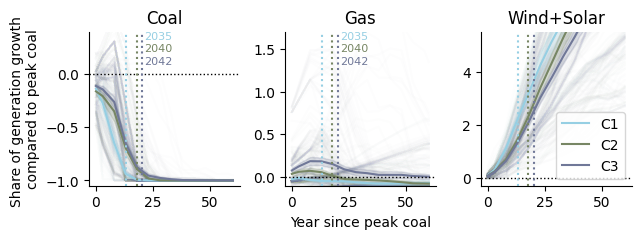

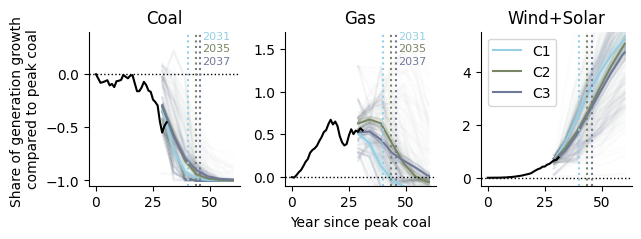

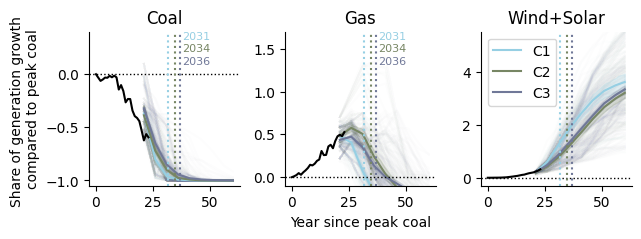

In [10]:
sub_variables = ["Coal_Growth_Share","Gas_Growth_Share","VRE_Growth_Share"]
ylim_list = [[-1.05,0.4],[-0.1,1.7],[-0.3,5.5]]
for reg in select_regions:
    fig, axes = plt.subplots(1,3,figsize=(7,2))
    fig.subplots_adjust(wspace=0.3)
    for i in [0,1,2]:
        var_sub_name = sub_variables[i]
        tech_name = tech_list[i]
        plot_data = gen_combined.query("Region==@reg")
        plot_data = plot_data[plot_data["years_since_coal_peak"]>=0]
        plot_data = plot_data[plot_data["Year"]>=2020]
        plot_data = plot_data[plot_data["years_since_coal_peak"]<=60]
        hist_plot_data = hist_gen_r10.query("AR6_R10==@reg")
        # projection data
        sns.lineplot(x="years_since_coal_peak",y=var_sub_name,data=plot_data,hue="Category",palette=C_colors,
                     units="unit",estimator=None,alpha=0.01,zorder=1,legend=None,ax=axes[i])
        if i !=2:
            sns.lineplot(x="years_since_coal_peak", y=var_sub_name,hue="Category",palette=C_colors,data=plot_data,ax=axes[i],legend=None)
        else:
            sns.lineplot(x="years_since_coal_peak", y=var_sub_name,hue="Category",palette=C_colors,data=plot_data,ax=axes[i])
        # historical data
        if len(hist_plot_data[hist_plot_data["Coal_Growth_Share"].isna()==False])!=0:
            sns.lineplot(x="years_since_coal_peak", y=var_sub_name,color="black",data=hist_plot_data,ax=axes[i])
        axes[i].spines['top'].set_visible(False)
        axes[i].spines['right'].set_visible(False)
        axes[i].set_title(tech_name)
        axes[i].set_ylim(ylim_list[i])
        axes[i].axhline(y = 0,linestyle=":",linewidth=1,color="black")
        axes[i].axvline(x = stats_regions.loc[reg,"C1_duration"],color=C1_c,linestyle=":")
        axes[i].axvline(x = stats_regions.loc[reg,"C2_duration"],color=C2_c,linestyle=":")
        axes[i].axvline(x = stats_regions.loc[reg,"C3_duration"],color=C3_c,linestyle=":")
        [bot,top] = axes[i].get_ylim()
        if i!=2:
            axes[i].text(x=stats_regions.loc[reg,"C3_duration"]+1,y=(top-bot)*0.95+bot,
                         s=str(round(stats_regions.loc[reg,"min_coal_year_C1"])),fontsize=8,ha="left",color=C1_c)
            axes[i].text(x=stats_regions.loc[reg,"C3_duration"]+1,y=(top-bot)*0.87+bot,
                         s=str(round(stats_regions.loc[reg,"min_coal_year_C2"])),fontsize=8,ha="left",color=C2_c)
            axes[i].text(x=stats_regions.loc[reg,"C3_duration"]+1,y=(top-bot)*0.79+bot,
                         s=str(round(stats_regions.loc[reg,"min_coal_year_C3"])),fontsize=8,ha="left",color=C3_c)
    #axes[2].legend(loc='center left', bbox_to_anchor=(1, 0.5),frameon=False)
    axes[0].set_ylabel("Share of generation growth \ncompared to peak coal")
    axes[1].set_ylabel(None)
    axes[2].set_ylabel(None)
    axes[0].set_xlabel(None)
    axes[1].set_xlabel("Year since peak coal")
    axes[2].set_xlabel(None)
    fig.savefig("figure_output/subs_electricity_"+reg+".png",dpi=600, bbox_inches='tight')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


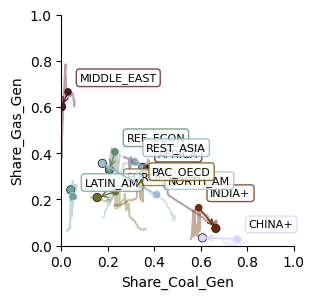

In [53]:
fig, axes = plt.subplots(figsize=(3,3))
color_p = [cm.glasgowS(i) for i in np.arange(len(hist_gen_r10["AR6_R10"].unique()))]
sns.lineplot(x='Share_Coal_Gen', y='Share_Gas_Gen',hue="AR6_R10",palette=color_p,data=hist_gen_r10,ax=axes,alpha=0.4,legend=None)
sns.scatterplot(x='Share_Coal_Gen', y='Share_Gas_Gen',hue="AR6_R10",palette=color_p,data=hist_gen_r10.query("Year==2022"),ax=axes,legend=None,edgecolor="black")
sns.scatterplot(x='Share_Coal_Gen', y='Share_Gas_Gen',hue="AR6_R10",palette=color_p,data=hist_gen_r10.query("Year==2010"),ax=axes,legend=None)
count = 0
for reg in hist_gen_r10["AR6_R10"].unique():
    start_data = hist_gen_r10.query("Year==2010").query("AR6_R10==@reg")
    end_data = hist_gen_r10.query("Year==2022").query("AR6_R10==@reg")
    axes.annotate(text="", xy=(start_data["Share_Coal_Gen"].iloc[0],start_data["Share_Gas_Gen"].iloc[0]),
                     xytext=(end_data["Share_Coal_Gen"].iloc[0],end_data["Share_Gas_Gen"].iloc[0]), 
                     arrowprops=dict(arrowstyle='<-',color=color_p[count],lw=1))
    axes.text(start_data["Share_Coal_Gen"].iloc[0]+0.05,start_data["Share_Gas_Gen"].iloc[0]+0.05,reg[3:], horizontalalignment='left',fontsize=8,color="black",
                bbox=dict(facecolor='white', edgecolor=color_p[count],boxstyle='round',alpha=0.8))
    count=count+1
#axes.legend(loc='center left', bbox_to_anchor=(1, 0.5),frameon=False)
axes.set_xlim([0,1])
axes.set_ylim([0,1])
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)

### by category

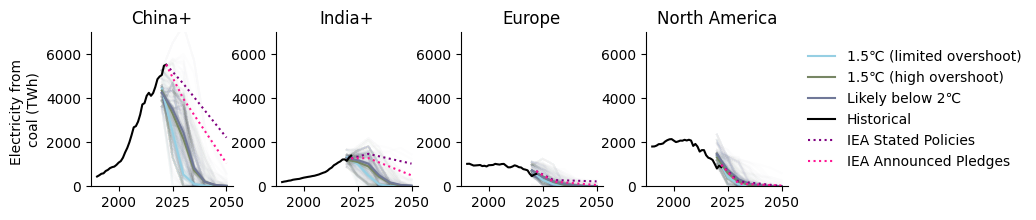

In [66]:
IEA_names = ["China","India","Europe","North America"]
title_names = ["China+","India+","Europe","North America"]
fig, axes = plt.subplots(1,4,figsize=(9,2))
fig.subplots_adjust(wspace=0.3)
var_name = 'Electricity from coal (TWh)'
var_name_AR6 = 'Coal_TWh'
var_name_IEA = 'Coal_Gen_TWh'
for reg in select_regions:
    i = select_regions.index(reg)
    plot_data = gen_combined.query("Region==@reg")
    plot_data = plot_data[plot_data["Year"]>=2020]
    plot_data = plot_data[plot_data["Year"]<=2050]
    hist_plot_data = hist_gen_r10.query("AR6_R10==@reg")
    # projection data
    sns.lineplot(x="Year",y=var_name_AR6,data=plot_data,hue="Label",palette=C_colors,
                 units="unit",estimator=None,alpha=0.01,zorder=1,legend=None,ax=axes[i])
    sns.lineplot(x="Year", y=var_name_AR6,hue="Label",palette=C_colors,data=plot_data,ax=axes[i])
    # historical data
    sns.lineplot(x="Year", y=var_name,color="black",data=hist_plot_data,ax=axes[i],label="Historical")
    # IEA data
    IEA_reg = IEA_names[i]
    sns.lineplot(x="Year", y=var_name_IEA,color="purple",data=coal_IEA.query("Region==@IEA_reg").query("Data_type=='STEPS'"),
                 linestyle=':',ax=axes[i],label="IEA Stated Policies")
    sns.lineplot(x="Year", y=var_name_IEA,color="deeppink",data=coal_IEA.query("Region==@IEA_reg").query("Data_type=='APS'"),
                 linestyle=':',ax=axes[i],label="IEA Announced Pledges")
    axes[i].spines['top'].set_visible(False)
    axes[i].spines['right'].set_visible(False)
    axes[i].set_title(title_names[i])
    axes[i].set_ylim([0,7000])
    axes[i].set_xlabel(None)
    if i != 0:
        axes[i].set_ylabel(None)
    if i == 3:
        axes[i].legend(loc='center left', bbox_to_anchor=(1.05, 0.5),frameon=False)
    else:
        axes[i].get_legend().remove()
axes[0].set_ylabel("Electricity from \ncoal (TWh)")
fig.savefig("figure_output/electricity_from_coal.png",dpi=600, bbox_inches='tight')

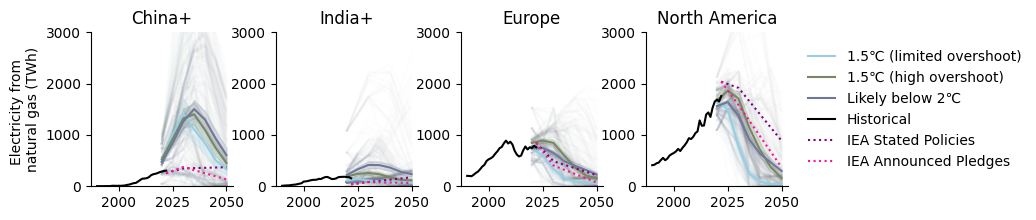

In [67]:
IEA_names = ["China","India","Europe","North America"]
title_names = ["China+","India+","Europe","North America"]
fig, axes = plt.subplots(1,4,figsize=(9,2))
fig.subplots_adjust(wspace=0.3)
var_name = 'Electricity from gas (TWh)'
var_name_AR6 = 'Gas_TWh'
var_name_IEA = 'Gas_Gen_TWh'
for reg in select_regions:
    i = select_regions.index(reg)
    plot_data = gen_combined.query("Region==@reg")
    plot_data = plot_data[plot_data["Year"]>=2020]
    plot_data = plot_data[plot_data["Year"]<=2050]
    hist_plot_data = hist_gen_r10.query("AR6_R10==@reg")
    # projection data
    sns.lineplot(x="Year",y=var_name_AR6,data=plot_data,hue="Label",palette=C_colors,
                 units="unit",estimator=None,alpha=0.01,zorder=1,legend=None,ax=axes[i])
    sns.lineplot(x="Year", y=var_name_AR6,hue="Label",palette=C_colors,data=plot_data,ax=axes[i])
    # historical data
    sns.lineplot(x="Year", y=var_name,color="black",data=hist_plot_data,ax=axes[i],label="Historical")
    # IEA data
    IEA_reg = IEA_names[i]
    sns.lineplot(x="Year", y=var_name_IEA,color="purple",data=gas_IEA.query("Region==@IEA_reg").query("Data_type=='STEPS'"),
                 linestyle=':',ax=axes[i],label="IEA Stated Policies")
    sns.lineplot(x="Year", y=var_name_IEA,color="deeppink",data=gas_IEA.query("Region==@IEA_reg").query("Data_type=='APS'"),
                 linestyle=':',ax=axes[i],label="IEA Announced Pledges")
    axes[i].spines['top'].set_visible(False)
    axes[i].spines['right'].set_visible(False)
    axes[i].set_title(title_names[i])
    axes[i].set_ylim([0,3000])
    axes[i].set_xlabel(None)
    if i != 0:
        axes[i].set_ylabel(None)
    if i == 3:
        axes[i].legend(loc='center left', bbox_to_anchor=(1.05, 0.5),frameon=False)
    else:
        axes[i].get_legend().remove()
axes[0].set_ylabel("Electricity from \nnatural gas (TWh)")
fig.savefig("figure_output/electricity_from_gas.png",dpi=600, bbox_inches='tight')